# ML: Naive Bayes classification

In [ ]:
## classification is one form of unsupervised learning.
## all data points are annotated with a label -- the points with the same label are part of the same class
## there can be two or more labels
## the data points may have certain features that can be used to predict the classification

In [ ]:
## naive bayes can be demonstrated using Gaussian distributions

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

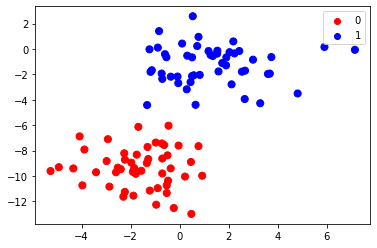

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();
#plt.colorbar();

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [4]:
## NB fitted two-dimensional Gaussian distribution to the data
## means and variances define the distributions completely
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
Standard deviations: [[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


In [5]:
## let's plot these distributions -- with a helper function that plots an ellipse

def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

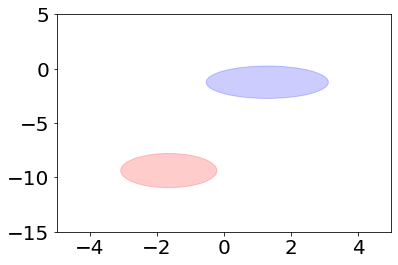

In [6]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue");

In [7]:
## the accuracy score gives a measure about how well the labels were predicted
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

Accuracy score is 1.0


In [ ]:
## score was max -- we predicted already seen data

## Another example

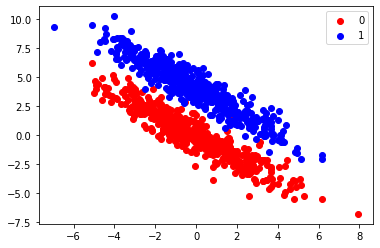

In [8]:
## let's generate some data using multivariate normal distributions
cov=np.array([[ 4.68, -4.32], [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

In [9]:
## two clusters seem to be quite separate -- try NB on this data
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y)

In [10]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-0.1231677   0.05825554]
 [-0.08365762  4.08222816]]
Standard deviations: [[4.92836786 4.84257164]
 [4.70778629 4.89268986]]


Accuracy score is 0.806


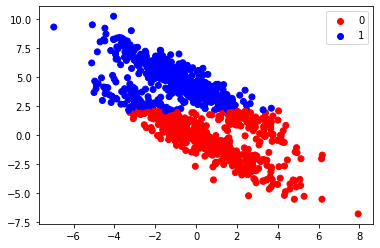

In [11]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="0")
plt.scatter([], [], color="blue", label="1")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score is", acc)

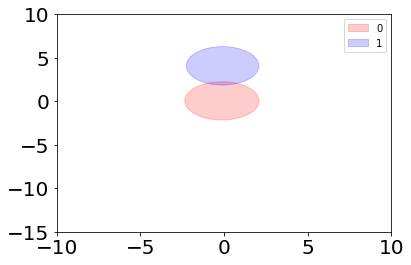

In [12]:
## the score is quite good, but the algorith didn't have good models for the data
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue", label="1")
plt.legend([e1, e2], ["0", "1"]);

In [ ]:
## NB classification tries to model the data using Gaussian distributions, which are aligned on y and x axes
## in this examples, we would have needed "tilted" Gaussian distributions

## Text classification

In [13]:
## we try classify a set of messages posted on a forum
## this messages were divided into groups by the topics
## let's try the classification testing, but first load the data
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [14]:
## we concentrate on four messages categories only
## fetch_20newsgroups easily splits data into training and testing data
categories = ['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.crypt']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [15]:
print("Training data:", "Data:", str(type(train.data)), len(train.data), "Target:", str(type(train.target)), len(train.target))
print("Test data:", "Data:", str(type(test.data)), len(test.data), "Target", str(type(test.data)), len(test.target))

Training data: Data: <class 'list'> 2364 Target: <class 'numpy.ndarray'> 2364
Test data: Data: <class 'list'> 1574 Target <class 'list'> 1574


In [16]:
## we use as features the frequencies of each word in the dataset
## there are as many features as there are distinct words in the dataset
## as the features are now counts, it is sensible to use multinomial distribution instead of Gaussian

## each message category has its own distribution
## class CountVectorizer from scikit-learn contverts the messages in form of text strings to feature vectos
## this conversion can be integrated with the model we are using, so it happens withn the fit method using the make_pipeline tool
#from sklearn.feature_extraction.text import TfidfVectorizer  # an alternative feature extractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels_fitted = model.predict(test.data)
print("Accuracy score is", accuracy_score(labels_fitted, test.target))

Accuracy score is 0.920584498094028


In [17]:
## the classifier seems to be working well
## now we use separate data for testing the model
vec = CountVectorizer()
features=vec.fit_transform(train.data)
print("Type of feature matrix:", type(features))
print(features[0,:])        # print the features of the first sample point

Type of feature matrix: <class 'scipy.sparse.csr.csr_matrix'>
  (0, 15373)	1
  (0, 18962)	3
  (0, 21852)	5
  (0, 9553)	4
  (0, 34790)	6
  (0, 13317)	6
  (0, 19099)	1
  (0, 16034)	1
  (0, 30377)	1
  (0, 26624)	1
  (0, 23858)	1
  (0, 20509)	1
  (0, 15109)	2
  (0, 11079)	1
  (0, 23854)	2
  (0, 32729)	1
  (0, 20381)	1
  (0, 2100)	1
  (0, 12580)	1
  (0, 18085)	1
  (0, 27158)	1
  (0, 31686)	6
  (0, 23118)	1
  (0, 25400)	1
  (0, 17310)	1
  :	:
  (0, 11100)	1
  (0, 27521)	1
  (0, 29104)	1
  (0, 5980)	1
  (0, 30641)	1
  (0, 27517)	1
  (0, 12577)	1
  (0, 25336)	1
  (0, 24025)	1
  (0, 18436)	1
  (0, 29505)	1
  (0, 29494)	1
  (0, 11068)	1
  (0, 21787)	1
  (0, 23460)	1
  (0, 34425)	1
  (0, 16809)	1
  (0, 17883)	1
  (0, 31398)	1
  (0, 34222)	1
  (0, 25926)	1
  (0, 6320)	1
  (0, 29697)	1
  (0, 19220)	1
  (0, 20579)	1


In [18]:
## the feature matrix is stored in sparse format, the nonzero counts are stored
## how many words were in the first message?
print("Number of words:", features[0,:].sum())
col = vec.vocabulary_["it"]   # Get the column of 'it' word in the feature matrix
print(f"Word 'it' appears in the first message {features[0, col]} times.")
print()
print(train.data[0])   # Let's print the corresponding message as well
#print(vec.get_feature_names())

Number of words: 177
Word 'it' appears in the first message 2 times.

From: jgfoot@minerva.cis.yale.edu (Josh A. Goldfoot)
Subject: Re: Organized Lobbying for Cryptography
Organization: Yale University
Lines: 21
Distribution: inet
Reply-To: jgfoot@minerva.cis.yale.edu
NNTP-Posting-Host: minerva.cis.yale.edu
X-Newsreader: TIN [version 1.1 Minerva PL9]

Shaun P. Hughes (sphughes@sfsuvax1.sfsu.edu) wrote:
: In article <1r3jgbINN35i@eli.CS.YALE.EDU> jgfoot@minerva.cis.yale.edu writes:
[deletion]
: >Perhaps these encryption-only types would defend the digitized porn if it
: >was posted encrypted?
: >
: >These issues are not as seperable as you maintain.
: >

: Now why would anyone "post" anything encrypted? Encryption is only of 
: use between persons who know how to decrypt the data.

: And why should I care what other people look at? 

I was responding to another person (Tarl Neustaedter) who held that the
EFF wasn't the best organization to fight for crytography rights since the
EFF also

In [3]:
## exercise 01 blob classification
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

def blob_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_fitted = model.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_fitted)
    return acc

In [24]:
X,y = datasets.make_blobs(100, 2, centers=2, random_state=2, cluster_std=2.5)
print("The accuracy score is", blob_classification(X, y))
a=np.array([[2, 2, 0, 2.5],
            [2, 3, 1, 1.5],
            [2, 2, 6, 3.5],
            [2, 2, 3, 1.2],
            [2, 4, 4, 2.7]])
accs=[]
for row in a:
    X,y = datasets.make_blobs(100, int(row[0]), centers=int(row[1]),
                                random_state=int(row[2]), cluster_std=row[3])
    accs.append(blob_classification(X, y))
print(repr(np.hstack([a, np.array(accs)[:,np.newaxis]])))

The accuracy score is 0.96
array([[2.  , 2.  , 0.  , 2.5 , 0.74],
       [2.  , 3.  , 1.  , 1.5 , 1.  ],
       [2.  , 2.  , 6.  , 3.5 , 0.82],
       [2.  , 2.  , 3.  , 1.2 , 1.  ],
       [2.  , 4.  , 4.  , 2.7 , 0.85]])


In [ ]:
## another solution
def blob_classification(X, y):
    model = GaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,train_size=0.75)
    model.fit(X_train, y_train)
    y_fitted = model.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_fitted)
    return acc

In [33]:
## exercise 02: plant classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import metrics

def plant_classification():
    #1_load dataset
    X, y = load_iris(return_X_y = True)
    #2_split into testing and training
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    #3_fit training daata with Gaussian NB
    model = naive_bayes.GaussianNB()
    model.fit(X_train, y_train)
    #4_pedict labels
    labels_fitted = model.predict(X_test)
    #5_accuracy
    accuracy = metrics.accuracy_score(y_test, labels_fitted)
    return accuracy

In [34]:
print(f"Accuracy is {plant_classification()}")

Accuracy is 0.9666666666666667


In [ ]:
## another solution
def plant_classification():
    data = load_iris()
    X = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
    model = naive_bayes.GaussianNB()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return metrics.accuracy_score(y_test, y_predicted)

# ML: Clustering

# ML: Principal component analysis